### First: Import required packages

In [38]:
import numpy as np
import pandas as pd
import sys
import random
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score,recall_score,precision_score, roc_curve, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import GridSearchCV
import math
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)

### function to evaluate training, test accuarcy, recall and precision

In [39]:
def evaluate_model(model,predicted_train, predicted_test):
    print("Train Accuracy :", accuracy_score(y_tr, predicted_train))
    print("Train recall :", recall_score(y_tr, predicted_train))
    print("Train precision :", precision_score(y_tr, predicted_train))

    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_ts, predicted_test))
    print("Test recall :", recall_score(y_ts, predicted_test))
    print("Test precision :", precision_score(y_ts, predicted_test))
    print("\n\t\t\t\t\t\tclassification report for training data\n")
    
    print(classification_report(y_tr, predicted_train))
    print("\n\t\t\t\t\t\tclassification report for test data\n")
    print(classification_report(y_ts, predicted_test))
    plot_confusion_matrix(model, X_tr, y_tr ,normalize='true')
    plot_confusion_matrix(model, X_ts, y_ts,normalize='true')
    plt.show()

    return accuracy_score(y_ts, predicted_test), recall_score(y_ts, predicted_test), precision_score(y_ts, predicted_test)

### function to draw decision tree

In [40]:
def get_dt_graph(classifier,features, labels):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(classifier,
                       feature_names=features,
                       class_names=labels,
                       filled=True)
    plt.show()                   


### function to polt precision, recall vs thresholds for each classifier

In [41]:
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    rng = np.arange(0,1.1,0.05)
    plt.figure(figsize = (20,7))

    plt.xticks(rng)
    plt.yticks(rng)
    #plot precision values vs thresholds values
    plt.plot(thresholds, precisions[:-1], "r--", label="Precision")
    #plot recalls values vs thresholds values
    plt.plot(thresholds, recalls[:-1], "p--", label="Recall")
    plt.title("Precision-Recall vs Thresholds curve")
    plt.xlabel("Threshold")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
    plt.show()


### function to polt roc and roc_auc curve for each classifier

In [42]:
def plot_roc(y_ts,predicted_ts_prob,title = None,Algorithm = None):

    no_skill_probs = [0 for _ in range(len(y_ts))]

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_ts, predicted_ts_prob)
    ns_fpr, ns_tpr, _ = roc_curve(y_ts, no_skill_probs)
    # calculate AUC
    auc = roc_auc_score(y_ts, predicted_ts_prob)
    no_skill_auc = roc_auc_score(y_ts, no_skill_probs)
    print('AUC: %.4f' % auc)
    plt.plot(fpr, tpr, label=f"ROC curve (area = {round(auc*100,4)}% -- {Algorithm})", lw=2)

    if title is not None:
        print('No Skill AUC: %.4f' % no_skill_auc)
        plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', lw=2)

    # plot the roc curve for the model
    

    plt.title(f"Receiver operating characteristic --{title}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.legend()



### Second make class called prepare_data

we want to convert categorical data into one hot encoding and divide it to train and test randomly

In [43]:
class prepare_data:
    def __init__(self,data) -> None:
        self.data = data
        self.y = self.data.values[:,-1]
        plt.figure(figsize = (20,7))
        sns.heatmap(df.corr(), annot = True, cmap="rainbow")
        plt.show()
    def one_hot_encoding(self,features=None):
        #convert each feature of these to one hot encoding values and put it to the last of data frame
        self.OHE_data = pd.get_dummies(self.data.iloc[:,:-1], columns=features)
        self.X = self.OHE_data.values
        
        return self.OHE_data
    def divid_to_tr_ts(self):
        #self.X.shape[0] number of rows in whole dataset you can also use self.y.shape[0] instead
        rand = random.sample(range(self.X.shape[0]), self.X.shape[0])
        #start splitting randomly
        train, test = np.split(rand, [int(.75*len(rand))])
          
        X_tr = self.X[train]
        y_tr = self.y[train]
        X_ts = self.X[test]
        y_ts = self.y[test]
        return X_tr,X_ts, y_tr,y_ts 

In [44]:
df = pd.read_csv('data.csv',index_col='Unnamed: 0')

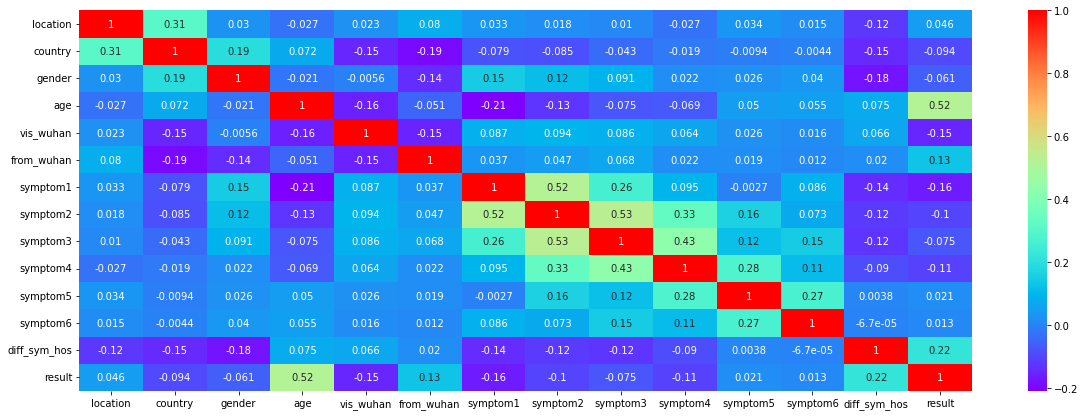

In [45]:
obj = prepare_data(df)
col_name = np.array(df.columns,dtype='str')
OHE_DF = obj.one_hot_encoding([col_name[2],col_name[6],col_name[7],col_name[8],col_name[9]])
X_tr,X_ts, y_tr,y_ts = obj.divid_to_tr_ts()
y_tr_unique = sorted(np.unique(np.array(y_tr,dtype='str')))

### Build decision tree classifier

DecisionTreeClassifier()
Fitting 5 folds for each of 50 candidates, totalling 250 fits
DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
Train Accuracy : 0.9799072642967542
Train recall : 0.9390243902439024
Train precision : 0.9058823529411765
--------------------------------------------------
Test Accuracy : 0.9629629629629629
Test recall : 0.9230769230769231
Test precision : 0.8

						classification report for training data

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       565
         1.0       0.91      0.94      0.92        82

    accuracy                           0.98       647
   macro avg       0.95      0.96      0.96       647
weighted avg       0.98      0.98      0.98       647


						classification report for test data

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       190
         1.0       0.80      0.92      0.86        26

    accuracy               

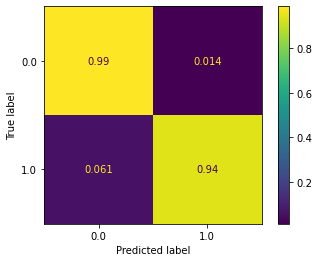

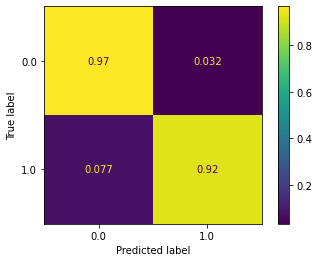

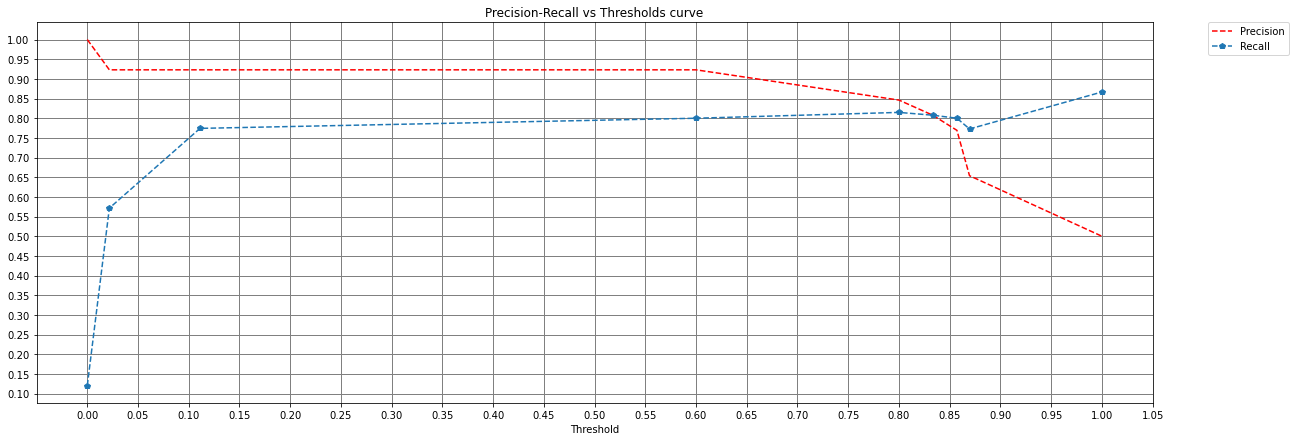

AUC: 0.9451
No Skill AUC: 0.5000


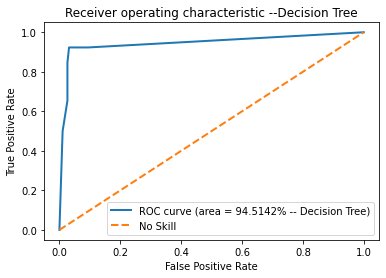

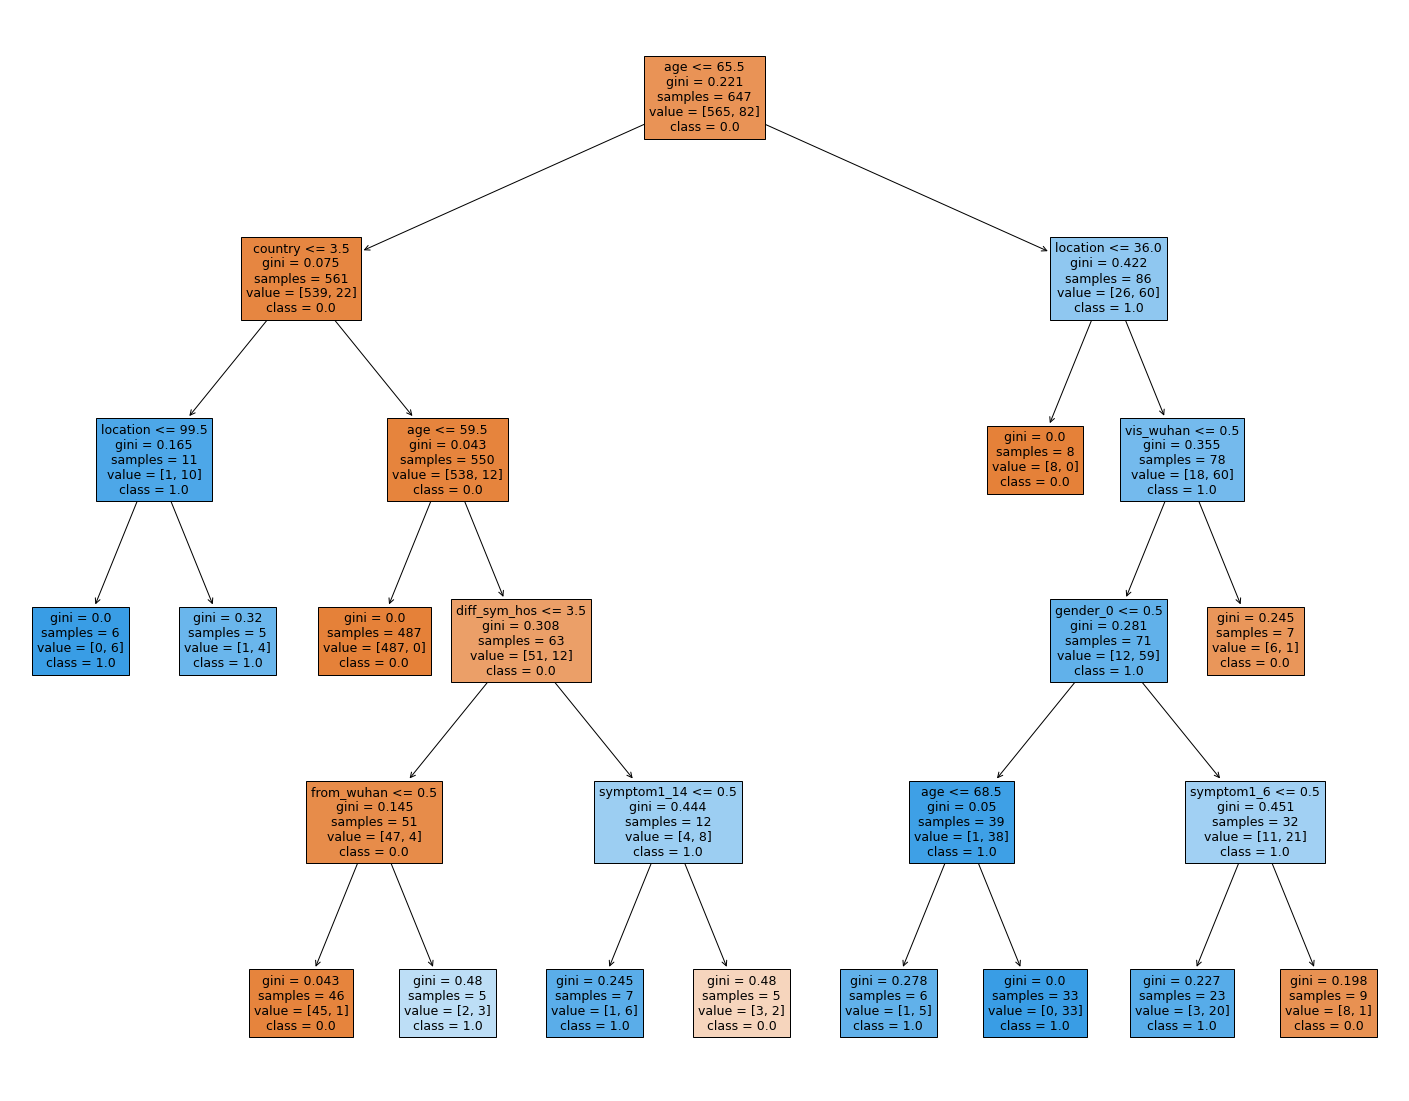

In [46]:
#decision tree parameters
decision_tree_params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["entropy", "gini"]
}
model = DecisionTreeClassifier()
print(model)

#grid search to estimate best hyperparameters for decision tree classifer

grid_search = GridSearchCV(estimator=model, 
                            param_grid=decision_tree_params, 
                            cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")


#train our model
grid_search.fit(X_tr,y_tr)


score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()
#predict test samples
predicted_test = grid_search.predict(X_ts)
#predict train samples
predicted_train = grid_search.predict(X_tr)

#predict the probabilty of each sample to make smooth curve
predicted_test_proba = grid_search.predict_proba(X_ts)

print(grid_search.best_estimator_)

accuracy, recall, precision = evaluate_model(grid_search.best_estimator_,predicted_train,predicted_test) 

#get recalls, precisions and thresholds for decision tree classifier to plot them
recalls, precisions, thresholds = precision_recall_curve(y_ts, predicted_test_proba[:,1])
plot_precision_recall_vs_thresholds(precisions,recalls,thresholds)
#plot smooth roc curve
plot_roc(y_ts, predicted_test_proba[:,1],"Decision Tree","Decision Tree")
plt.show()
plt.show()
#plot decision tree graph
get_dt_graph(grid_search.best_estimator_,OHE_DF.columns, y_tr_unique)



### Build KNN classifier

KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=8, p=1,
                     weights='distance')
Train Accuracy : 1.0
Train recall : 1.0
Train precision : 1.0
--------------------------------------------------
Test Accuracy : 0.9537037037037037
Test recall : 0.6923076923076923
Test precision : 0.9

						classification report for training data

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       565
         1.0       1.00      1.00      1.00        82

    accuracy                           1.00       647
   macro avg       1.00      1.00      1.00       647
weighted avg       1.00      1.00      1.00       647


						classification report for test data

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       190
         1.0       0.90      0.69      0.78        26

    accuracy                           0.95       216
   macro avg       0.93      0.84      0.88       216
w

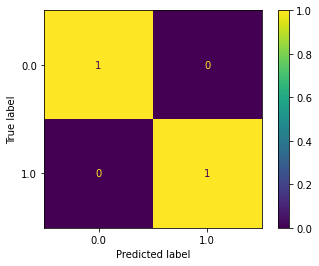

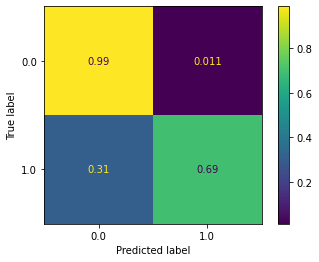

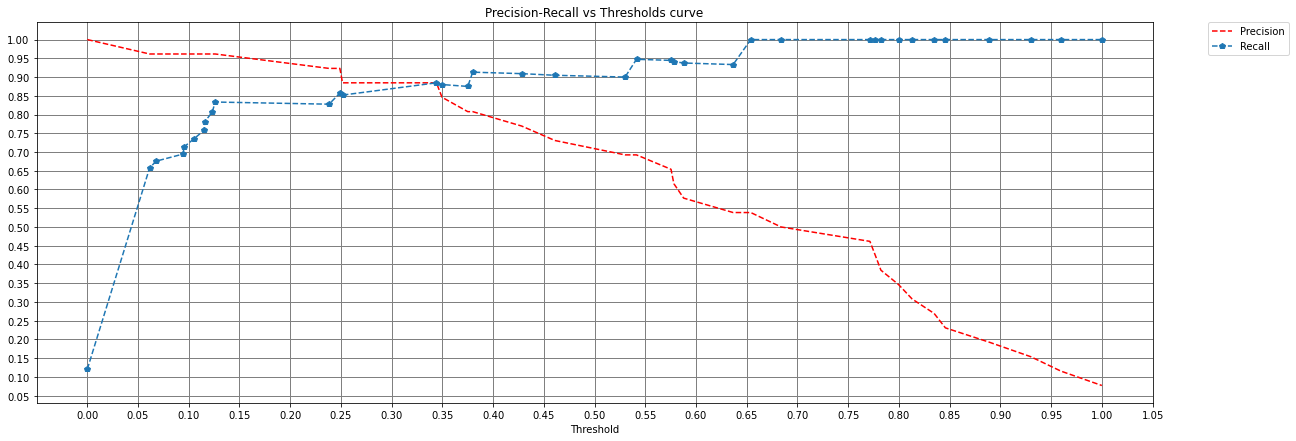

AUC: 0.9744
No Skill AUC: 0.5000


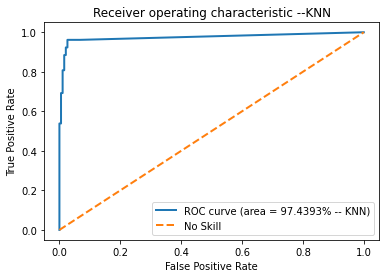

In [47]:
n_neighbors = np.arange(3,round(math.sqrt(X_tr.shape[0])+1)).tolist()
p=[1,2]
##K-nearest neighbors parameters

n_neighbors_paras = {'leaf_size': np.arange(1,50).tolist(),
'weights': ['uniform', 'distance'],
'algorithm':['auto'],
'n_neighbors':n_neighbors,
'p':p,
'n_jobs': [-1]}
knn_clf = KNeighborsClassifier(n_jobs=-1)
#grid search to estimate best hyperparameters for KNN classifer
gridsearch_clf = GridSearchCV(knn_clf, n_neighbors_paras, cv=4)

#start train knn classifer
gridsearch_clf.fit(X_tr, y_tr)
#predict test samples
knn_predicted_test = gridsearch_clf.predict(X_ts)
#predict train samples, it will always be 1 because knn doesn't need to train
knn_predicted_train = gridsearch_clf.predict(X_tr)
#predict the probabilty of each sample to make smooth curve

knn_predicted_test_proba = gridsearch_clf.predict_proba(X_ts)

score_df = pd.DataFrame(gridsearch_clf.cv_results_)
score_df.head()

print(gridsearch_clf.best_estimator_)

accuracy, recall, precision = evaluate_model(gridsearch_clf.best_estimator_,knn_predicted_train,knn_predicted_test) 
#get recalls, precisions and thresholds for KNN classifier to plot them
knn_recalls, knn_precisions, knn_thresholds = precision_recall_curve(y_ts, knn_predicted_test_proba[:,1])
plot_precision_recall_vs_thresholds(knn_precisions,knn_recalls,knn_thresholds)
plt.show()
#plot roc curve for knn classifier
plot_roc(y_ts, knn_predicted_test_proba[:,1],"KNN","KNN")
plt.show()


LogisticRegression(C=1, max_iter=10000, random_state=0, solver='liblinear')
Train Accuracy : 0.9520865533230294
Train recall : 0.6951219512195121
Train precision : 0.9047619047619048
--------------------------------------------------
Test Accuracy : 0.9629629629629629
Test recall : 0.7692307692307693
Test precision : 0.9090909090909091

						classification report for training data

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       565
         1.0       0.90      0.70      0.79        82

    accuracy                           0.95       647
   macro avg       0.93      0.84      0.88       647
weighted avg       0.95      0.95      0.95       647


						classification report for test data

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       190
         1.0       0.91      0.77      0.83        26

    accuracy                           0.96       216
   macro avg       0.94  

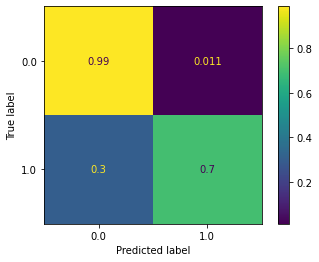

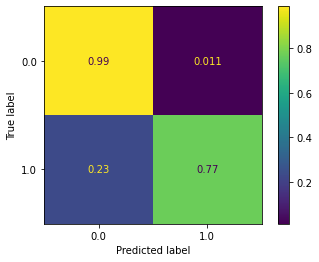

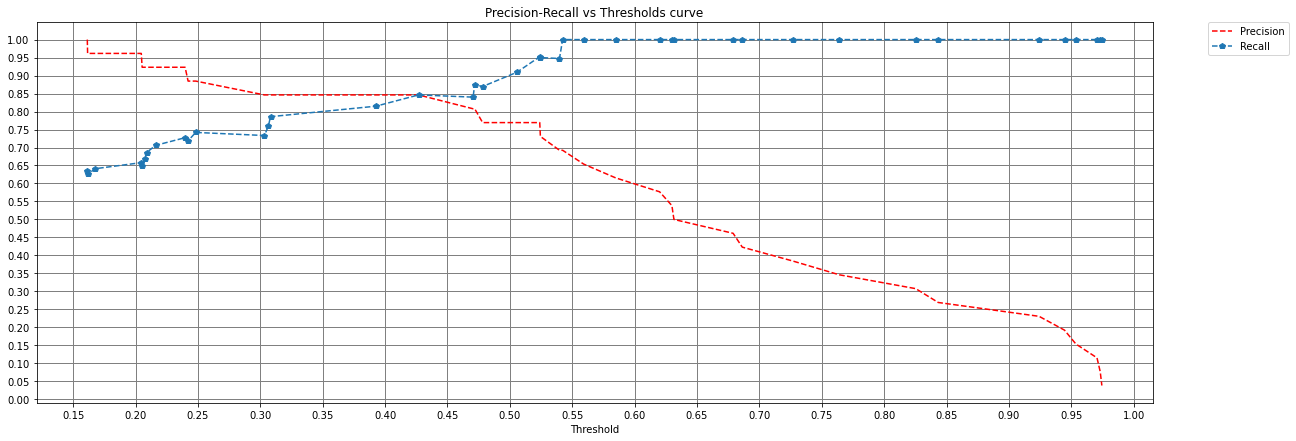

AUC: 0.9891
No Skill AUC: 0.5000


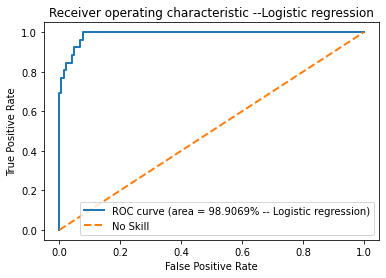

In [48]:
log_classifier = LogisticRegression(random_state = 0)
logistic_reg_paras = {'penalty':['l2'],'C':[1e5,1e4,1e3,1e2,10,1,0.5,0.1,0.01,0.05,0.0001,0.0005],'solver':["liblinear"],'max_iter' : [10000]}
#grid search to estimate best hyperparameters for logistic regression classifer
gridsearch_clf = GridSearchCV(log_classifier,logistic_reg_paras, cv=4)

gridsearch_clf.fit(X_tr, y_tr)
#predict test samples
log_predicted_test = gridsearch_clf.predict(X_ts)
#predict train samples
log_predicted_train = gridsearch_clf.predict(X_tr)
#predict the probabilty of each sample to make smooth curve
log_predicted_test_proba = gridsearch_clf.predict_proba(X_ts)

score_df = pd.DataFrame(gridsearch_clf.cv_results_)
score_df.head()

print(gridsearch_clf.best_estimator_)

accuracy, recall, precision = evaluate_model(gridsearch_clf.best_estimator_,log_predicted_train,log_predicted_test) 
#get recalls, precisions and thresholds for logistic regression classifier to plot them
log_recalls, log_precisions, log_thresholds = precision_recall_curve(y_ts, log_predicted_test_proba[:,1])
plot_precision_recall_vs_thresholds(log_precisions,log_recalls,log_thresholds)
plt.show()
#plot roc curve classifier for logistic regression classifier
plot_roc(y_ts, log_predicted_test_proba[:,1],"Logistic regression","Logistic regression")
plt.show()


## Gaussian naive classifier

GaussianNB(var_smoothing=0.003072112998861756)
Train Accuracy : 0.9165378670788253
Train recall : 0.4024390243902439
Train precision : 0.868421052631579
--------------------------------------------------
Test Accuracy : 0.9212962962962963
Test recall : 0.4230769230769231
Test precision : 0.8461538461538461

						classification report for training data

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       565
         1.0       0.87      0.40      0.55        82

    accuracy                           0.92       647
   macro avg       0.89      0.70      0.75       647
weighted avg       0.91      0.92      0.90       647


						classification report for test data

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       190
         1.0       0.85      0.42      0.56        26

    accuracy                           0.92       216
   macro avg       0.89      0.71      0.76       216
w

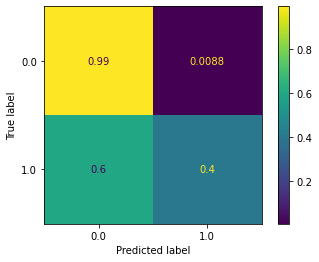

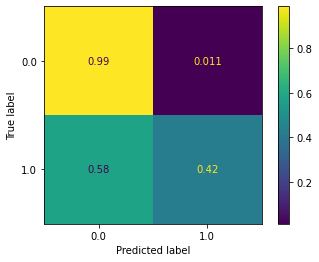

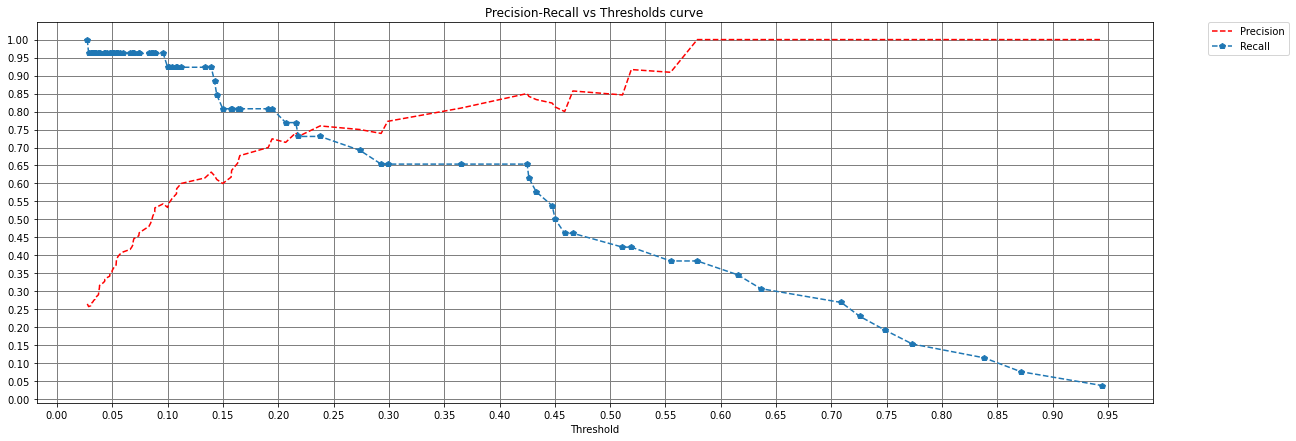

AUC: 0.9636
No Skill AUC: 0.5000


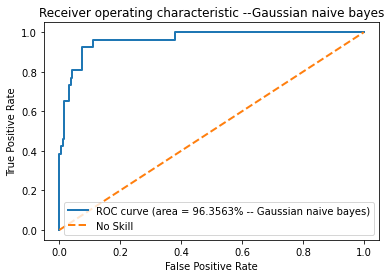

In [49]:
gaussian_classifier = GaussianNB()
gaussian_paras = {
    'var_smoothing': np.logspace(0, -10, num=200)
}
#grid search to estimate best hyperparameters for Gaussian naive bayes classifer

gridsearch_clf = GridSearchCV(gaussian_classifier,gaussian_paras, cv=4)

gridsearch_clf.fit(X_tr, y_tr)
#predict test samples
gauss_predicted_test = gridsearch_clf.predict(X_ts)
#predict train samples
gauss_predicted_train = gridsearch_clf.predict(X_tr)
#predict the probabilty of each sample to make smooth curve
gauss_predicted_test_proba = gridsearch_clf.predict_proba(X_ts)

score_df = pd.DataFrame(gridsearch_clf.cv_results_)
score_df.head()

print(gridsearch_clf.best_estimator_)

accuracy, recall, precision = evaluate_model(gridsearch_clf.best_estimator_,gauss_predicted_train,gauss_predicted_test) 
#get recalls, precisions and thresholds for gaussian naive bayes classifier to plot them
gauss_recalls, gauss_precisions, gauss_thresholds = precision_recall_curve(y_ts, gauss_predicted_test_proba[:,1])
plot_precision_recall_vs_thresholds(gauss_recalls,gauss_precisions,gauss_thresholds)
plt.show()
#plot roc curve classifier for gaussian naive bayes classifier
plot_roc(y_ts, gauss_predicted_test_proba[:,1],"Gaussian naive bayes","Gaussian naive bayes")
plt.show()

### SVM scikit learn

SVC(C=0.01, degree=2, gamma=0.5, kernel='poly', probability=True)
Train Accuracy : 0.9922720247295209
Train recall : 0.9512195121951219
Train precision : 0.9873417721518988
--------------------------------------------------
Test Accuracy : 0.9537037037037037
Test recall : 0.8076923076923077
Test precision : 0.8076923076923077

						classification report for training data

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       565
         1.0       0.99      0.95      0.97        82

    accuracy                           0.99       647
   macro avg       0.99      0.97      0.98       647
weighted avg       0.99      0.99      0.99       647


						classification report for test data

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       190
         1.0       0.81      0.81      0.81        26

    accuracy                           0.95       216
   macro avg       0.89      0.89  

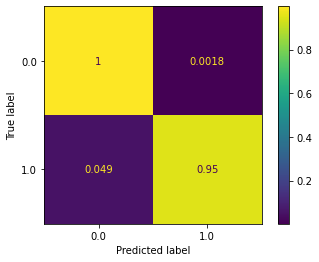

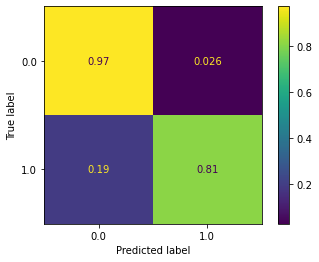

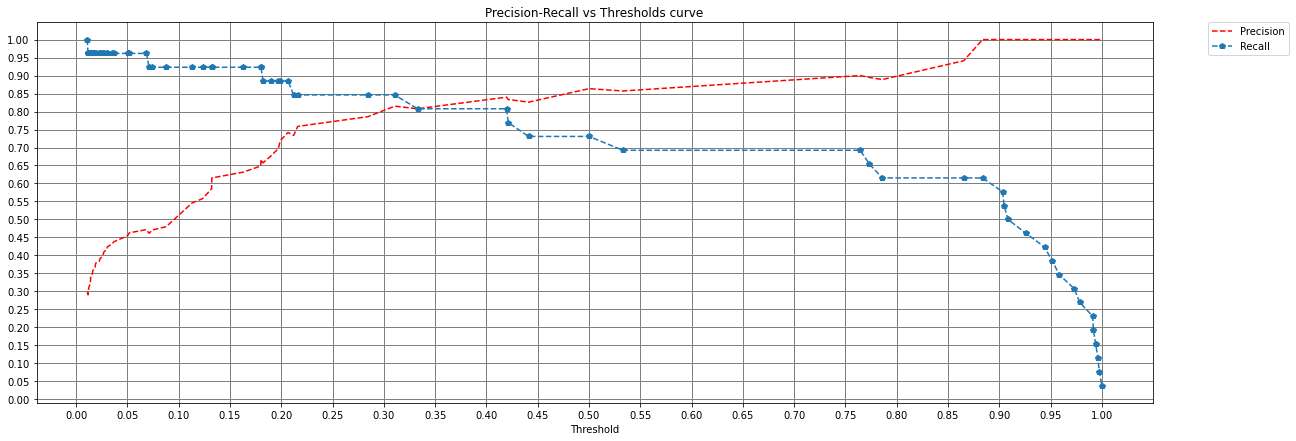

AUC: 0.9739
No Skill AUC: 0.5000


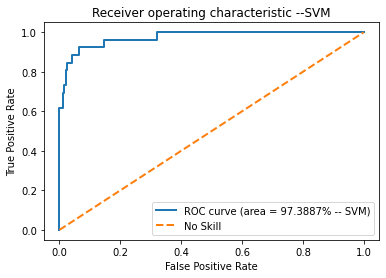

In [50]:
svm_param_grid = {
    'C': [0.001, 0.01, 0.1],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2,3,4],
    'gamma': [0.1, 0.5]
}
#grid search to estimate best hyperparameters for SVM classifer

SVM = svm.SVC(probability=True)
grid = GridSearchCV(SVM, svm_param_grid)
grid.fit(X_tr,y_tr)

#predict test samples
svm_predicted_test = grid.predict(X_ts)
#predict train samples
svm_predicted_train = grid.predict(X_tr)
#predict the probabilty of each sample to make smooth curve
svm_predicted_test_proba = grid.predict_proba(X_ts)

score_df = pd.DataFrame(grid.cv_results_)
score_df.head()

print(grid.best_estimator_)

accuracy, recall, precision = evaluate_model(grid.best_estimator_,svm_predicted_train,svm_predicted_test) 
#get recalls, precisions and thresholds for SVM classifier classifier to plot them
svm_recalls, svm_precisions, svm_thresholds = precision_recall_curve(y_ts, svm_predicted_test_proba[:,1])
plot_precision_recall_vs_thresholds(svm_recalls,svm_precisions,svm_thresholds)
plt.show()
#plot smooth roc curve for svm classifier
plot_roc(y_ts, svm_predicted_test_proba[:,1],"SVM","SVM")
plt.show()


## Result and comparison

AUC: 0.9451
AUC: 0.9744
AUC: 0.9891
AUC: 0.9636
AUC: 0.9739
No Skill AUC: 0.5000


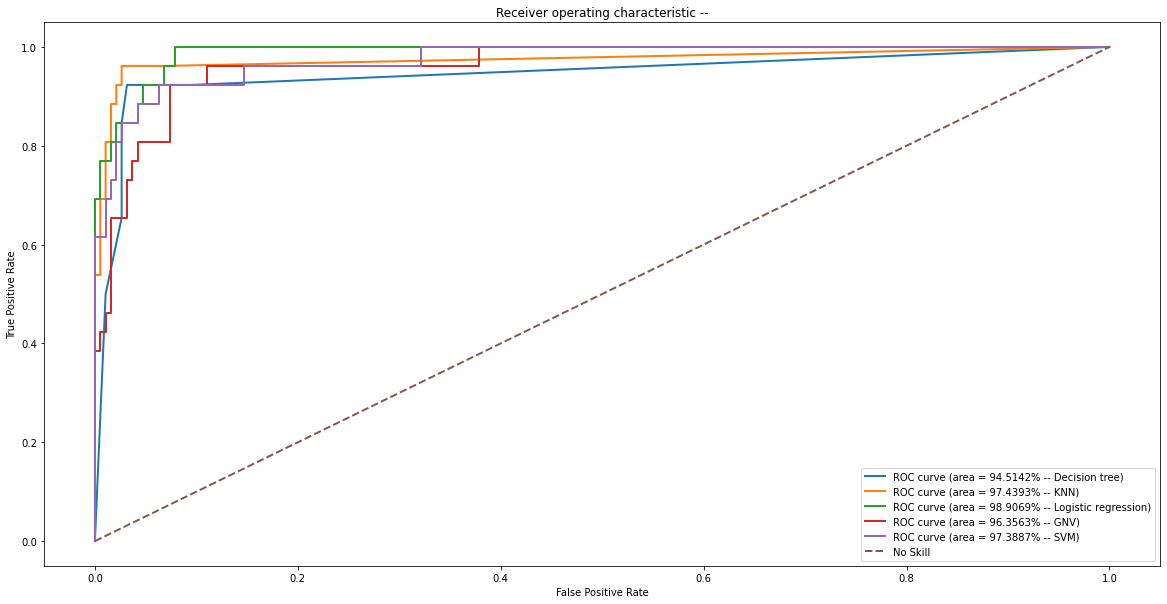

In [52]:
plt.figure(figsize=(20,10))
#plot roc and roc_auc curve for all classifier to comapre between them.
plot_roc(y_ts, predicted_test_proba[:,1],title= None, Algorithm="Decision tree")
plot_roc(y_ts, knn_predicted_test_proba[:,1],title = None, Algorithm="KNN")
plot_roc(y_ts, log_predicted_test_proba[:,1],title=None, Algorithm="Logistic regression")
plot_roc(y_ts, gauss_predicted_test_proba[:,1],title=None, Algorithm="GNV")
plot_roc(y_ts, svm_predicted_test_proba[:,1],title="", Algorithm="SVM")
plt.show()